### Time Series Data Analysis

- Observation collected over a sequence of time interval
- analysis trend of daily, weekly, hourly, monthly etc
- Characteristics are 
    - chronological Order - regular interval
    - sequential order - current observation depends on past
    - temporal components - trend, seassonality, cyclic, noise
    - constant frequency - continous data without any missing values.
    - dynamic noise - affected by external factors
- Statistical technnic used to extract meaningfull insights about patterns and trend.
    - understanding the past
    - forecasting future

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = yf.download("AAPL", start="2024-01-01")   
# df = yf.download("RELIANCE.NS", start="2024-01-01")   

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,183.903214,186.677021,182.169586,185.399081,82488700
2024-01-03,182.526230,184.140985,181.713894,182.496512,58414500
2024-01-04,180.208130,181.377083,179.187767,180.445875,71983600
2024-01-05,179.484940,181.050159,178.484394,180.287374,62379700
2024-01-08,183.823975,183.863609,179.801961,180.386437,59144500


### Data Cleaning and Preprocessing

1. Handling Missing Values 

- Date with no values or date is not present in the dataset.

    - Imputation - replace value with mean, median, mode, forward fill or backward fill
    - Interpolation - replace the value with surrounding value. linear , spline, polynomial
    - using machine learning

2. Making Data Stationary
3. Handling Outliers
    - Imputation & Interpolation
    - Transformation (Log, box cox)
    - Smoothing techniques


4. Resampling
    - Upsampling - increasing frequency , monthly to daily
    - Downsampling - decreasing frequency, Daily to monthly

    interpolation are used to  fill the gaps

In [67]:
sample_data = {
    "Date" : ['2024-01-01','2024-01-02','2024-01-03','2024-01-04','2024-01-07','2024-01-08','2024-01-09','2024-01-10','2024-01-11','2024-01-14'],
    "Price" : [130,132,131,133,135,134,136,137,138,139]
}

# Create DataFrame
data_df = pd.DataFrame(sample_data)
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df.set_index('Date', inplace=True)

data_df

,Price
Date,
2024-01-01,130
2024-01-02,132
2024-01-03,131
2024-01-04,133
2024-01-07,135
2024-01-08,134
2024-01-09,136
2024-01-10,137
2024-01-11,138


In [68]:
complete_index = pd.date_range(start=data_df.index.min(), end=data_df.index.max(), freq='D')
data_df = data_df.reindex(complete_index)

print("Data after reindexing to include missing dates:", data_df)

Data after reindexing to include missing dates:             Price
2024-01-01  130.0
2024-01-02  132.0
2024-01-03  131.0
2024-01-04  133.0
2024-01-05    NaN
2024-01-06    NaN
2024-01-07  135.0
2024-01-08  134.0
2024-01-09  136.0
2024-01-10  137.0
2024-01-11  138.0
2024-01-12    NaN
2024-01-13    NaN
2024-01-14  139.0


In [73]:
# mean Imputation

mean_value = data_df.mean()
data_mean_imputed = data_df.fillna(mean_value)

# median imputation
median_value = data_df.median()
data_median_imputed = data_df.fillna(median_value)

# mode imputation
mode_value = data_df.mode()
data_mode_imputed = data_df.fillna(mode_value.values[0][0])

# forward fill
data_ffill = data_df.fillna(method='ffill')

# backward fill
data_bfill = data_df.fillna(method='bfill')

print("original Data with Missing Values:\n", data_df)
print("--------------------------------------------------")
print("\nMean Imputed Data:\n", data_mean_imputed)
print("--------------------------------------------------")
print("\nMedian Imputed Data:\n", data_median_imputed) 
print("--------------------------------------------------") 
print("\nMode Imputed Data:\n", data_mode_imputed)
print("--------------------------------------------------")
print("\nForward Fill Imputed Data:\n", data_ffill)
print("--------------------------------------------------")
print("\nBackward Fill Imputed Data:\n", data_bfill)

original Data with Missing Values:
             Price
2024-01-01  130.0
2024-01-02  132.0
2024-01-03  131.0
2024-01-04  133.0
2024-01-05    NaN
2024-01-06    NaN
2024-01-07  135.0
2024-01-08  134.0
2024-01-09  136.0
2024-01-10  137.0
2024-01-11  138.0
2024-01-12    NaN
2024-01-13    NaN
2024-01-14  139.0
--------------------------------------------------

Mean Imputed Data:
             Price
2024-01-01  130.0
2024-01-02  132.0
2024-01-03  131.0
2024-01-04  133.0
2024-01-05  134.5
2024-01-06  134.5
2024-01-07  135.0
2024-01-08  134.0
2024-01-09  136.0
2024-01-10  137.0
2024-01-11  138.0
2024-01-12  134.5
2024-01-13  134.5
2024-01-14  139.0
--------------------------------------------------

Median Imputed Data:
             Price
2024-01-01  130.0
2024-01-02  132.0
2024-01-03  131.0
2024-01-04  133.0
2024-01-05  134.5
2024-01-06  134.5
2024-01-07  135.0
2024-01-08  134.0
2024-01-09  136.0
2024-01-10  137.0
2024-01-11  138.0
2024-01-12  134.5
2024-01-13  134.5
2024-01-14  139.0
--------

In [74]:
# Interpolation
data_linear_interpolated = data_df.interpolate(method='linear')
print("--------------------------------------------------")
print("\nLinearly Interpolated Data:\n", data_linear_interpolated)

data_polynomial_interpolated = data_df.interpolate(method='polynomial', order=2)
print("--------------------------------------------------")
print("\nPolynomial Interpolated Data:\n", data_polynomial_interpolated)

data_spline_interpolated = data_df.interpolate(method='spline', order=2)
print("--------------------------------------------------")     
print("\nSpline Interpolated Data:\n", data_spline_interpolated)

--------------------------------------------------

Linearly Interpolated Data:
                  Price
2024-01-01  130.000000
2024-01-02  132.000000
2024-01-03  131.000000
2024-01-04  133.000000
2024-01-05  133.666667
2024-01-06  134.333333
2024-01-07  135.000000
2024-01-08  134.000000
2024-01-09  136.000000
2024-01-10  137.000000
2024-01-11  138.000000
2024-01-12  138.333333
2024-01-13  138.666667
2024-01-14  139.000000
--------------------------------------------------

Polynomial Interpolated Data:
                  Price
2024-01-01  130.000000
2024-01-02  132.000000
2024-01-03  131.000000
2024-01-04  133.000000
2024-01-05  134.747516
2024-01-06  135.480429
2024-01-07  135.000000
2024-01-08  134.000000
2024-01-09  136.000000
2024-01-10  137.000000
2024-01-11  138.000000
2024-01-12  138.717216
2024-01-13  139.050550
2024-01-14  139.000000
--------------------------------------------------

Spline Interpolated Data:
                  Price
2024-01-01  130.000000
2024-01-02  132.00000

In [77]:
# Predictive Modeling

data_df['Sales'] = [700, 720, 710, 730, 750, 740, 760, 790, 800, 810, 820, 830, 840, 850 ]
data_df

,Price,Sales
2024-01-01,130.0,700
2024-01-02,132.0,720
2024-01-03,131.0,710
2024-01-04,133.0,730
2024-01-05,NaN,750
2024-01-06,NaN,740
2024-01-07,135.0,760
2024-01-08,134.0,790
2024-01-09,136.0,800
2024-01-10,137.0,810


In [78]:
from sklearn.linear_model import LinearRegression
known_data = data_df.dropna(subset=['Price'])
missing_data = data_df[data_df['Price'].isna()]

#training the model with known data
model = LinearRegression()
model.fit(known_data[['Sales']], known_data['Price'])

# predicting missing values
predicted_prices = model.predict(missing_data[['Sales']])
data_df.loc[data_df['Price'].isna(), 'Price'] = predicted_prices

print("Data after Predictive Modeling Imputation:\n", data_df)

Data after Predictive Modeling Imputation:
                  Price  Sales
2024-01-01  130.000000    700
2024-01-02  132.000000    720
2024-01-03  131.000000    710
2024-01-04  133.000000    730
2024-01-05  133.433238    750
2024-01-06  132.871784    740
2024-01-07  135.000000    760
2024-01-08  134.000000    790
2024-01-09  136.000000    800
2024-01-10  137.000000    810
2024-01-11  138.000000    820
2024-01-12  137.924867    830
2024-01-13  138.486321    840
2024-01-14  139.000000    850


In [79]:
# Resampling
# downsampling
monthly_data = df['Close'].resample('M').mean()

print("Monthly Resampled Data:\n", monthly_data)

Monthly Resampled Data:
 Ticker            AAPL
Date                  
2024-01-31  185.968012
2024-02-29  183.209133
2024-03-31  171.299128
2024-04-30  168.232192
2024-05-31  184.952327
2024-06-30  204.871685
2024-07-31  223.083470
2024-08-31  220.319719
2024-09-30  222.505754
2024-10-31  228.768593
2024-11-30  226.723615
2024-12-31  248.200306
2025-01-31  233.530797
2025-02-28  237.634374
2025-03-31  221.943920
2025-04-30  200.498205
2025-05-31  203.431013
2025-06-30  200.235424
2025-07-31  210.837013
2025-08-31  224.361019
2025-09-30  242.251352
2025-10-31  258.045067
2025-11-30  270.539375


In [80]:
# Upsampling
hourly_data = df['Close'].resample('H').interpolate(method='linear')
print("Hourly Resampled Data:\n", hourly_data)

Hourly Resampled Data:
 Ticker                     AAPL
Date                           
2024-01-02 00:00:00  183.903214
2024-01-02 01:00:00  183.845839
2024-01-02 02:00:00  183.788465
2024-01-02 03:00:00  183.731091
2024-01-02 04:00:00  183.673716
...                         ...
2025-11-11 20:00:00  273.766668
2025-11-11 21:00:00  273.692501
2025-11-11 22:00:00  273.618334
2025-11-11 23:00:00  273.544168
2025-11-12 00:00:00  273.470001

[16321 rows x 1 columns]


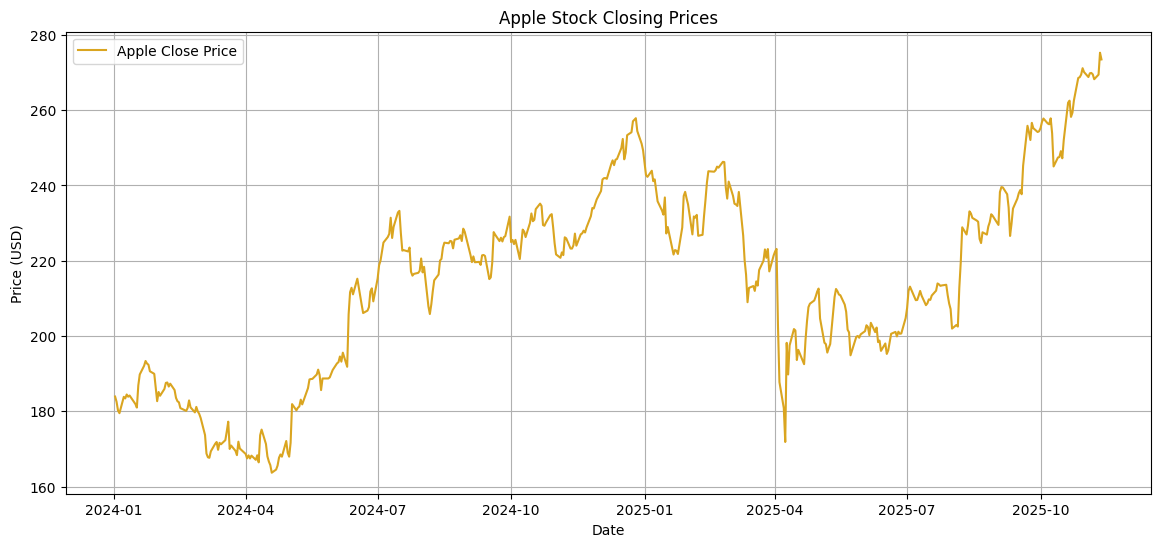

In [7]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Apple Close Price', color='goldenrod')
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

### Time Series Decomposition

- Decomposition is a method to break down a time series into its four main components to understand its structure.
- The 4 Components
1. Trend ($T_t$): The long-term upward or downward direction of the data.
2. Seasonality ($S_t$): A repeating pattern at fixed time intervals (e.g., daily, monthly).
3. Cyclic ($C_t$): A repeating pattern at non-fixed intervals (e.g., business or economic cycles).
4. Noise / Residual ($R_t$): The random, unpredictable fluctuations that are left over.


- Types of Decomposition Models - This is how the components are combined to create the original time series.
1. Additive Model Formula: $Y_t = T_t + S_t + C_t + R_t$
    - Use when: The seasonal or cyclic changes are constant (e.g., sales always increase by 100 units in summer).
2. Multiplicative Model Formula: $Y_t = T_t \times S_t \times C_t \times R_t$
    - Use when: The seasonal or cyclic changes are proportional to the trend (e.g., sales always increase by 20% in summer).



### Classical Time Series Decomposition

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_additive = seasonal_decompose(df['Close'], model='additive', period=30) # 30 days for monthly seasonality
decomposition_multiplicative = seasonal_decompose(df['Close'], model='multiplicative', period=30)

In [9]:
trend_add = decomposition_additive.trend
seasonal_add = decomposition_additive.seasonal 
residual_add = decomposition_additive.resid 

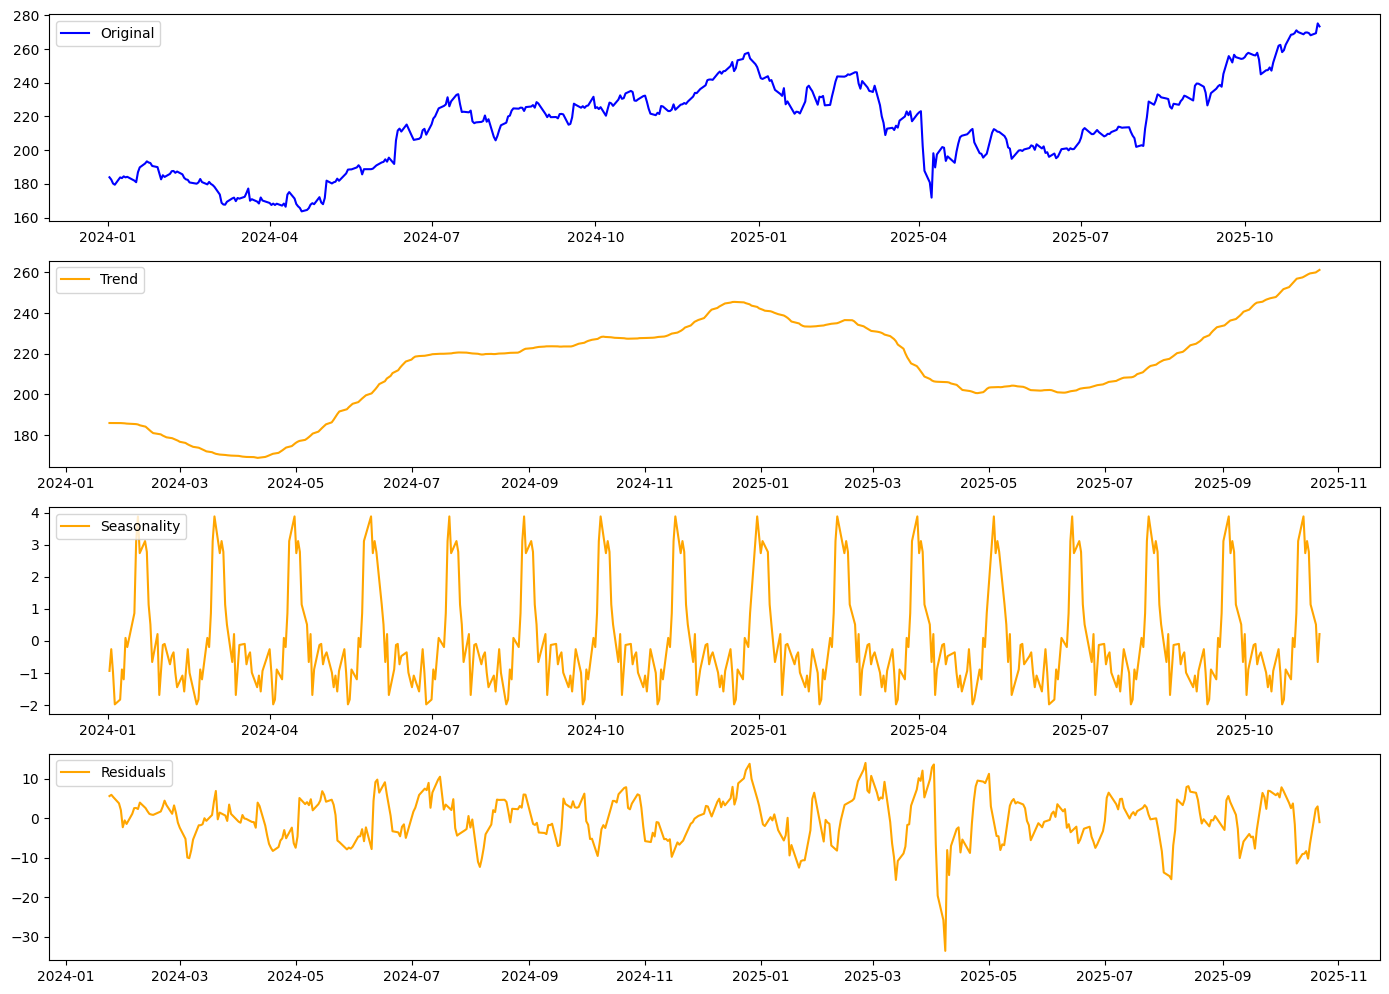

In [10]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(df['Close'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_add, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_add, label='Seasonality', color='orange')
plt.legend(loc='upper left')
plt.subplot(414)    
plt.plot(residual_add, label='Residuals', color='orange')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### STL Decomposition using (LOESS) - Locally estimated scatterplot smoothing

- handle outliers in time series data.
- in classical fixed seasonal pattern, but in STL variety seasonal patterns.
- it can only handle additive time series data.


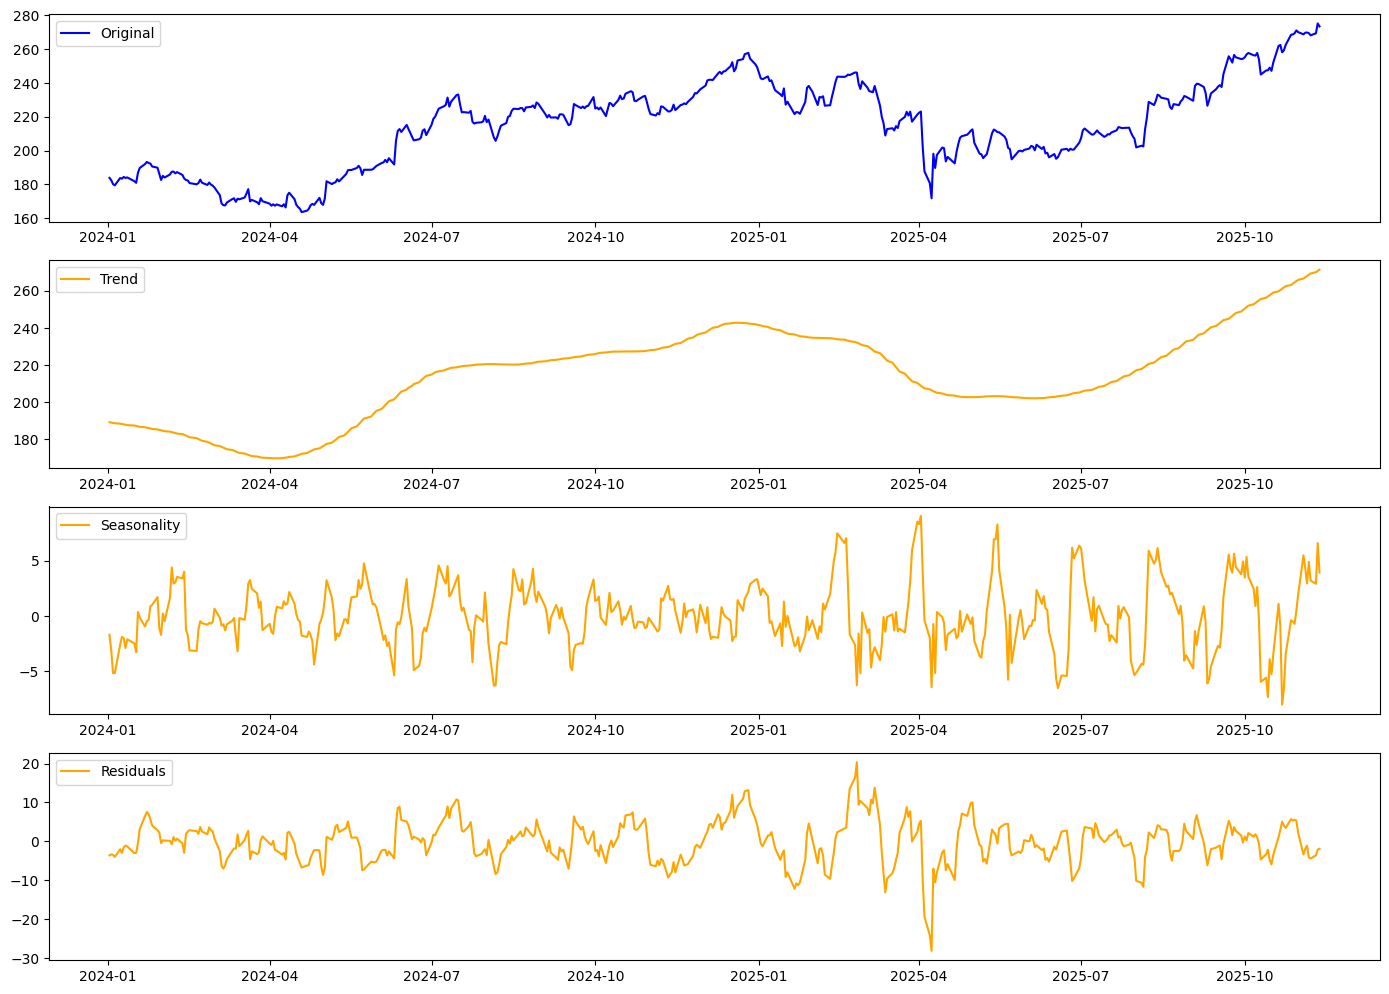

In [11]:
from statsmodels.tsa.seasonal import STL
stl = STL(df['Close'], period=30)  # seasonal=13 for monthly
result = stl.fit()

# Plot STL Decomposition
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(df['Close'], label='Original', color='blue')
plt.legend(loc='upper left')    
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality', color='orange')
plt.legend(loc='upper left')
plt.subplot(414)    
plt.plot(result.resid, label='Residuals', color='orange')
plt.legend(loc='upper left')    
plt.tight_layout()
plt.show()

### Stationarity in Time Series
- Stationarity is a fundamental concept in time-series analysis. A time series is considered stationary if its core statistical properties remain constant over time. Specifically, this means:

    - The mean of the series is constant.

    - The variance of the series is constant.

    - The autocorrelation (the relationship between the series and its lagged versions) is constant.

- Why Stationarity Matters
    - Stationarity makes prediction much easier because it implies that the statistical properties observed in the past will remain the same in the future. Many essential forecasting models, such as ARIMA (Autoregressive Integrated Moving Average), require data to be stationary to produce reliable and accurate predictions.

- Types of Stationarity - There are two main types of stationarity, which differ in their rigor:

    - Weak Stationarity (or Covariance Stationarity) This is the most common and practical definition. 
        - A series is weakly stationary if its mean, variance, and autocorrelation are constant over time. 
        - However, the joint probability distribution of the data can change. 
        - For most forecasting models and analyses of shorter data periods, achieving weak stationarity is the primary goal.

    - Strict Stationarity This is a much stronger and more theoretical condition. 
        - A series is strictly stationary if it exhibits all the properties of weak stationarity, 
        - with one major addition: the entire joint probability distribution of the data must remain unchanged when shifted along any time period. 
        - This assumption is rarely met in real-world data but is important when modeling the complete distribution of a process.

### Testing for Stationarity

- Several statistical tests can be used to formally check if a time series is stationary. 
- The choice of test depends on what you are looking for (e.g., absence of a unit root vs. stationarity around a trend).
- Testing for Weak Stationarity 
    - The two most common tests for weak stationarity are the ADF test and the KPSS test. 
    -It's often recommended to use them together, as they look at the problem from opposite perspectives.

    1. ADF Test (Augmented Dickey-Fuller)This is one of the most popular tests. 
        - It specifically checks for the presence of a unit root, which is a characteristic of non-stationary data.
        - Null Hypothesis ($H_0$): The data has a unit root (it is non-stationary).
        - Alternative Hypothesis ($H_1$): The data is stationary.
        - Decision Criteria:If the p-value is less than 0.05 ($p < 0.05$), you reject the null hypothesis ($H_0$). 
        - This means your data is stationary.Alternatively, if the ADF test statistic is less than the critical value, you reject $H_0$ and conclude the data is stationary.
        
    2. KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin)This test takes the opposite approach. 
        - It starts by assuming the data is stationary (either around a constant mean or a trend). 
        - It works by fitting a model with a constant mean (or trend) and measuring the variance of the cumulative sum of the residuals.Null Hypothesis ($H_0$): 
        - The data is stationary.Alternative Hypothesis ($H_1$): The data is non-stationary (it has a unit root).
        - Decision Criteria:If the p-value is less than 0.05 ($p < 0.05$), you reject the null hypothesis ($H_0$). 
        - This means your data is non-stationary.Alternatively, if the KPSS test statistic is greater than the critical value, you reject $H_0$ and conclude the data is non-stationary.
        - Pro-Tip: 
            - ADF ($p < 0.05$) $\rightarrow$ Stationary  
            - KPSS ($p < 0.05$) $\rightarrow$ Non-Stationary
        - If both tests agree (e.g., ADF says "stationary" and KPSS says "stationary"), you can be more confident. 
        - If they disagree, you may need to investigate your data further (e.g., it might be "difference stationary" vs. "trend stationary").
    
- Testing for Strict Stationarity

    1. KS Test (Kolmogorov-Smirnov Test)
        - This test is used to check for strict stationarity. 
        - Instead of just looking at mean and variance, it checks if the entire probability distribution remains the same over time.
        - It does this by comparing the Cumulative Distribution Function (CDF) of two different samples from the time series (e.g., the first half of the data and the second half).
            - Null Hypothesis ($H_0$): The two samples come from the same distribution.
            - Alternative Hypothesis ($H_1$): The two samples come from different distributions.
            - Decision Criteria:
                - If the p-value is greater than 0.05 ($p > 0.05$), you fail to reject the null hypothesis. 
                - This indicates there is no significant difference between the distributions, and the data can be considered strictly stationary.

In [12]:
from statsmodels.tsa.stattools import adfuller

# perform the Augmented Dickey-Fuller Test
adf_test = adfuller(df['Close'])
print("ADF Test Results : ")
print("ADF Statistic:", round(adf_test[0],3))
print("p-value:", round(adf_test[1],3))
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"   {key}: {round(value,3)}")
    

ADF Test Results : 
ADF Statistic: -1.148
p-value: 0.696
Critical Values:
   1%: -3.444
   5%: -2.868
   10%: -2.57


In [13]:
from statsmodels.tsa.stattools import kpss
import warnings
warnings.filterwarnings('ignore')


# perform the KPSS Test
kpss_test = kpss(df['Close'], regression='ct') # 'ct' for trend stationarity, 'c' for level stationarity
print("KPSS Test Results : ")
print("KPSS Statistic:", round(kpss_test[0],2))
print("p-value:", kpss_test[1])
print("Critical Values:")
for key, value in kpss_test[3].items():
    print(f"   {key}: {value}")

KPSS Test Results : 
KPSS Statistic: 0.39
p-value: 0.01
Critical Values:
   10%: 0.119
   5%: 0.146
   2.5%: 0.176
   1%: 0.216


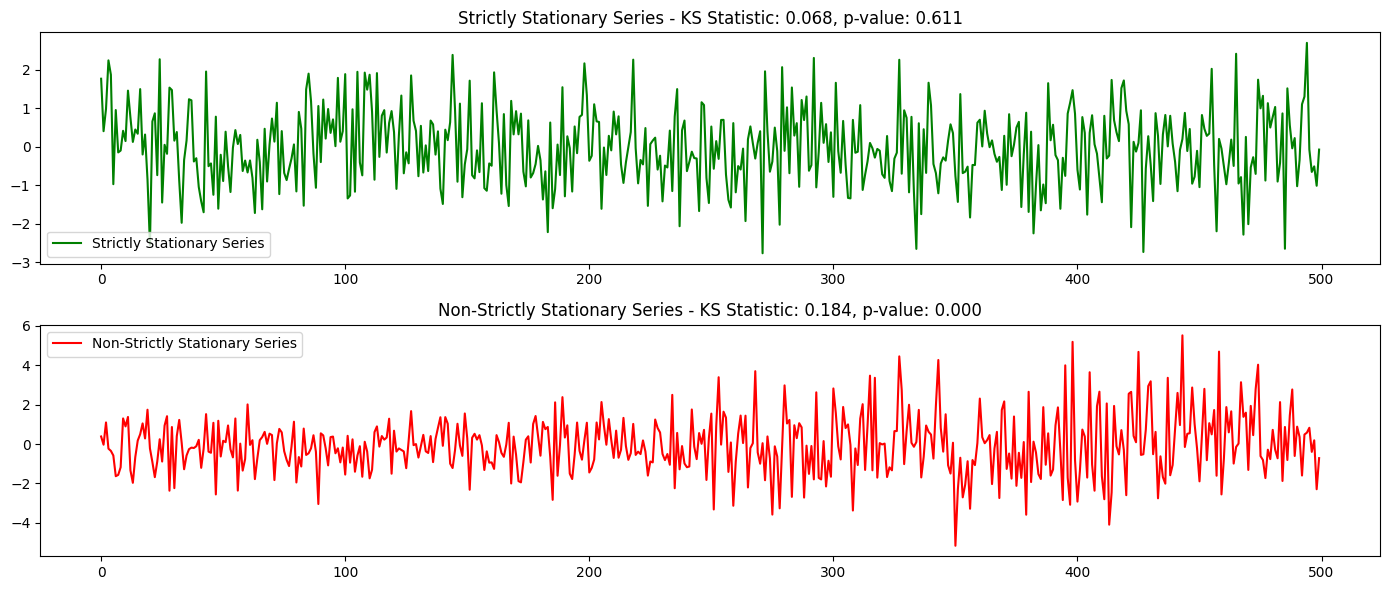

strictly stationary series - KS Statistic: 0.068 p-value: 0.611
non-strictly stationary series - KS Statistic: 0.184 p-value: 0.0


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import  kstest, ks_2samp

# generate synthetic time series data for demonstration
np.random.seed(0)
n=500

# strictly stationary series : normally distributed random noise
strict_stationary = np.random.normal(0, 1, n)

# Non-strictly stationary series : changing variance
non_strict_stationary = np.concatenate([np.random.normal(0, 1, n//2), np.random.normal(0, 2, n//2)])

# function to split time series into two halves and perform KS test 
def ks_test_stationarity(ts):
    mid = len(ts) // 2
    first_half = ts[:mid]
    second_half = ts[mid:]
    statistic, p_value = ks_2samp(first_half, second_half)
    return statistic, p_value

# perform the ks test on strictly stationary series
ks_stat_strict, ks_p_strict = ks_test_stationarity(strict_stationary)

# perform the ks test on non-strictly stationary series
ks_stat_non_strict, ks_p_non_strict = ks_test_stationarity(non_strict_stationary)

plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.plot(strict_stationary, label='Strictly Stationary Series', color='green')
plt.title(f'Strictly Stationary Series - KS Statistic: {ks_stat_strict:.3f}, p-value: {ks_p_strict:.3f}')
plt.legend()
plt.subplot(2,1,2)
plt.plot(non_strict_stationary, label='Non-Strictly Stationary Series', color='red')
plt.title(f'Non-Strictly Stationary Series - KS Statistic: {ks_stat_non_strict:.3f}, p-value: {ks_p_non_strict:.3f}')
plt.legend()
plt.tight_layout()
plt.show()

print("strictly stationary series - KS Statistic:", round(ks_stat_strict,3), "p-value:", round(ks_p_strict,3))
print("non-strictly stationary series - KS Statistic:", round(ks_stat_non_strict,3), "p-value:", round(ks_p_non_strict,3))

### How to Make Data Stationary 
- If your data is non-stationary, you must fix it before modeling.
1. Differencing (Fixes Trends / Mean)
    - What it is: Subtract the previous value from the current value.
    - Formula: $y'_t = y_t - y_{t-1}$
    - This is the most common way to remove trends and make the mean constant. 
    - You can difference multiple times (second-order, third-order) if needed.

2. Transformation (Fixes Variance)
    - What it is: Apply a math function to all your data points.
    - When to use: Use this if the "spread" (variance) of your data gets wider or smaller over time.
    - Common types: 
        - Log Transformation: $\log(y_t)$
        - Box-Cox Transformation: A smart transformation that finds the best function for you.

3. Detrending / Seasonal Adjustment (Fixes Trends & Seasonality)
    - What it is: Explicitly find the trend or seasonal pattern and remove it.
    - Example: Calculate a moving average (which acts as the trend) and then subtract it from your original data.

In [15]:
# performing ADF and KPSS tests

def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {round(value,3)}")


def kpss_test(series):
    result = kpss(series, regression='c') #'c' for level stationarity
    print("KPSS Test Results : ")
    print("KPSS Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[3].items():
        print(f"   {key}: {value}")

In [16]:
price = df['Close']

In [17]:
adf_test(price)

ADF Statistic: -1.147791116691244
p-value: 0.6956422030604063
Critical Values:
1%: -3.444
5%: -2.868
10%: -2.57


In [18]:
price_diff = price.diff()

In [19]:
price.head()

Ticker,AAPL
Date,
2024-01-02,183.903214
2024-01-03,182.526230
2024-01-04,180.208130
2024-01-05,179.484940
2024-01-08,183.823975


In [20]:
price_positive = price[price > 0]   # keep strictly positive values

In [21]:
from scipy import stats

# log transformation
log_price = np.log(price)

# square root transformation
sqrt_price = np.sqrt(price)

# convert to 1-D numpy array
prices = price_positive.squeeze()   # or use .squeeze() / .flatten()
print("array shape:", prices.shape)          # should print (n,)

# apply Box-Cox
boxcox_price, lam = stats.boxcox(prices)
print("lambda:", lam)

array shape: (469,)
lambda: 1.1294727280500898


In [22]:
adf_test(price_diff.dropna())

ADF Statistic: -12.734375866099834
p-value: 9.22837313387984e-24
Critical Values:
1%: -3.444
5%: -2.868
10%: -2.57


In [23]:
1.6211795043769698e-23 < 0.05

True

In [24]:
adf_test(boxcox_price)

ADF Statistic: -1.1240443769786925
p-value: 0.7053886691381281
Critical Values:
1%: -3.444
5%: -2.868
10%: -2.57


In [25]:
prices

Date
2024-01-02    183.903214
2024-01-03    182.526230
2024-01-04    180.208130
2024-01-05    179.484940
2024-01-08    183.823975
                 ...    
2025-11-06    269.508728
2025-11-07    268.209991
2025-11-10    269.429993
2025-11-11    275.250000
2025-11-12    273.470001
Name: AAPL, Length: 469, dtype: float64

In [26]:
from scipy import signal

# using a linear trend for detrending
trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))
detrended_price = prices - trendline

In [27]:
adf_test(detrended_price)

ADF Statistic: -1.9125379555206694
p-value: 0.3261860433880005
Critical Values:
1%: -3.444
5%: -2.868
10%: -2.57


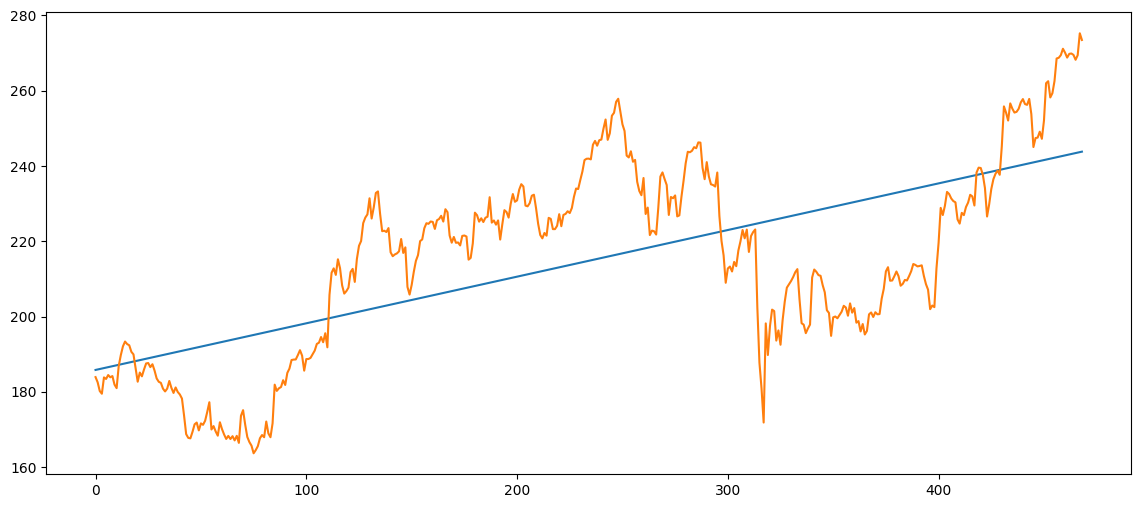

In [28]:
plt.figure(figsize=(14,6))
plt.plot(np.arange(len(prices)), trendline)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [29]:
# using moving average for detrending
window_size = 12  # 12-day moving average
price_ma = pd.Series(prices).rolling(window=window_size, center=True).mean()
detrended_price_ma = prices - price_ma
detrended_price_ma = detrended_price_ma.dropna()


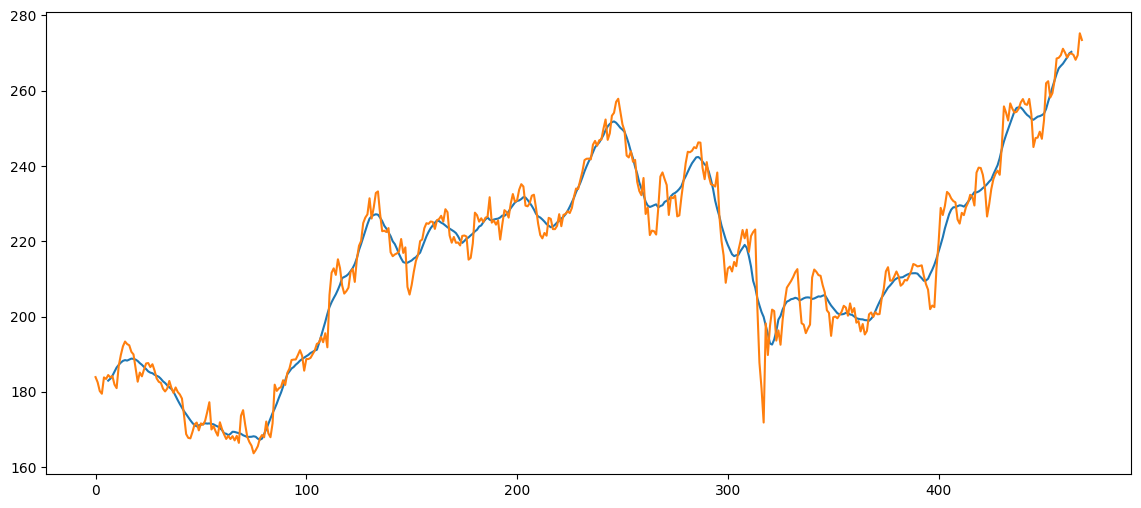

In [30]:
plt.figure(figsize=(14,6))
plt.plot(np.arange(len(prices)), price_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# seasonal decomposition using moving average detrended data
decomposition_ma = seasonal_decompose(prices, model='additive', period=30)
price_adjusted = prices / decomposition_ma.seasonal
price_adjusted = price_adjusted.dropna()


In [32]:
adf_test(price_adjusted)

ADF Statistic: -8.580936305078882
p-value: 7.732028313966198e-14
Critical Values:
1%: -3.445
5%: -2.868
10%: -2.57


white Noise & Random Walk

1. white Noise - no pattern , trend, or seasonality
- same mean
- constant variance
- no auto correlation
- completely randon - unpredictable

2. Random walk

- cummulative pattern
- it is predictable
- eg: stock price

3. identifying white noise

- visually
- ACF & PACF
- Ljung Box test - to check auto correlation

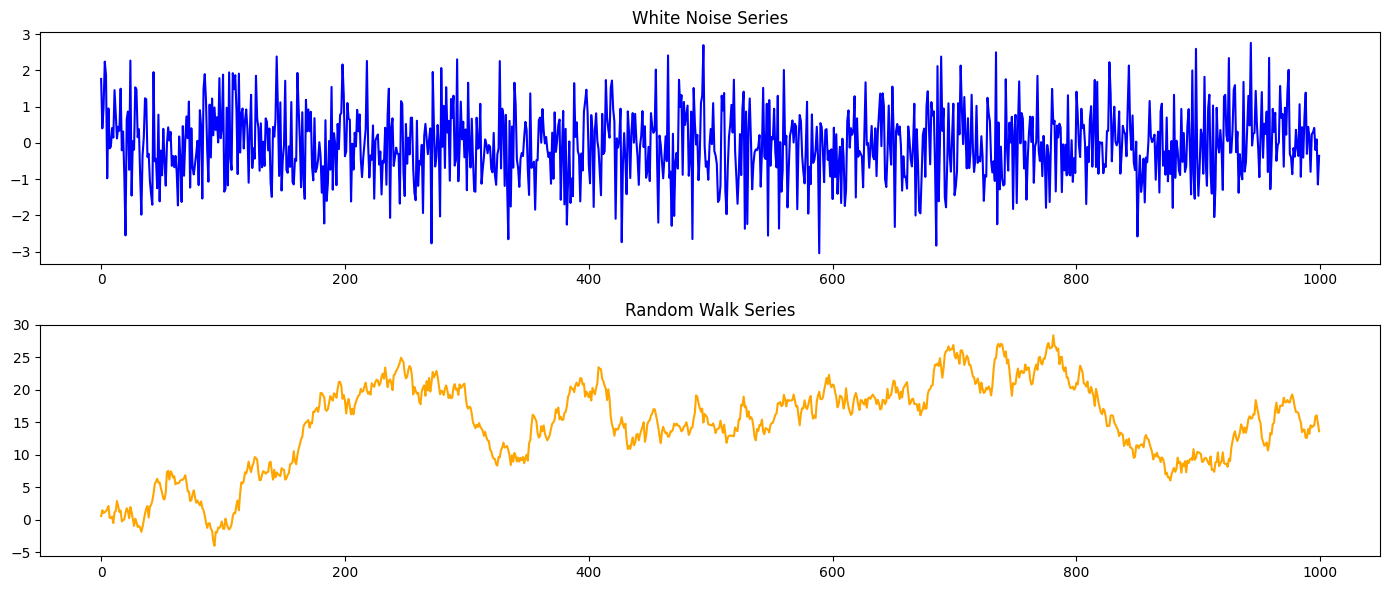

Ljung-Box Test for White Noise:
      lb_stat  lb_pvalue
10  14.025574   0.171828
Ljung-Box Test for Random Walk:
        lb_stat  lb_pvalue
10  8828.660312        0.0


In [33]:
from statsmodels.stats.diagnostic import acorr_ljungbox

#generate white noise and random walk values for comparison
np.random.seed(0)
n =1000

white_noise = np.random.normal(0, 1, n)

# random walk
randon_shocks = np.random.normal(0, 1, n)
random_walk = np.cumsum(randon_shocks)


#plotting the series
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.plot(white_noise, label='White Noise', color='blue')    
plt.title('White Noise Series')
plt.subplot(2,1,2)
plt.plot(random_walk, label='Random Walk', color='orange')    
plt.title('Random Walk Series')
plt.tight_layout()
plt.show()



# Ljung-Box test for white noise
lb_white = acorr_ljungbox(white_noise, lags=[10], return_df=True)
print("Ljung-Box Test for White Noise:")    
print(lb_white)

# Ljung-Box test for random walk
lb_rw = acorr_ljungbox(random_walk, lags=[10], return_df=True)
print("Ljung-Box Test for Random Walk:")    
print(lb_rw)

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
stock_data = yf.download("AAPL", start="2023-01-01")
apple_price_stationary = stock_data['Close'].diff().dropna()

stock_data.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-11-06,269.508728,273.135217,267.630574,267.630574,51204000
2025-11-07,268.209991,272.026299,266.511626,269.538690,48227400
2025-11-10,269.429993,273.730011,267.459991,268.959991,41312400
2025-11-11,275.250000,275.910004,269.799988,269.809998,46208300
2025-11-12,273.470001,275.730011,271.700012,275.000000,48359700


In [36]:
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]
train_data.head()

Ticker,AAPL
Date,
2023-01-04,1.270821
2023-01-05,-1.320091
2023-01-06,4.531631
2023-01-09,0.522125
2023-01-10,0.571381


In [37]:
from statsmodels.tsa.ar_model import AutoReg

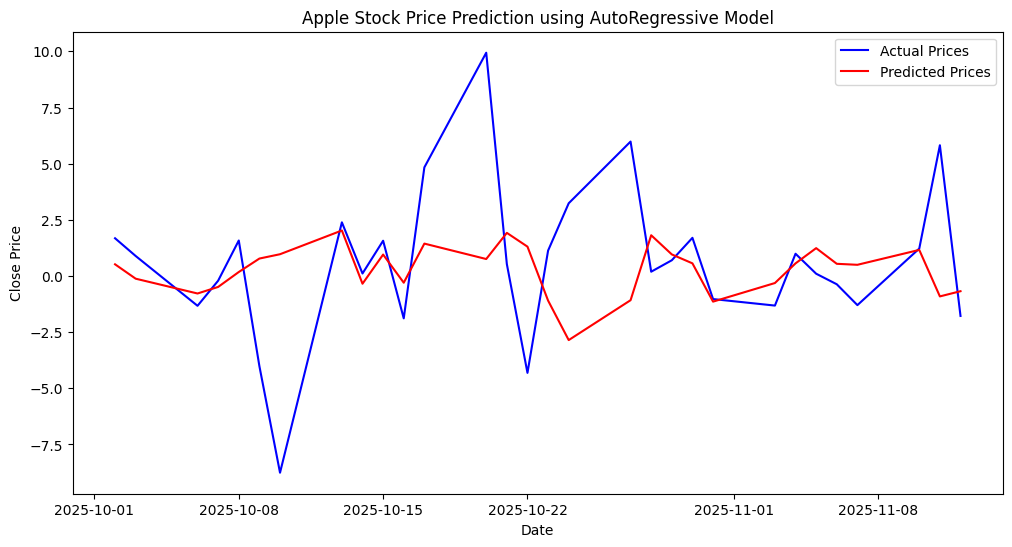

Mean Squared Error: 13.467860576915834
Root Mean Squared Error: 3.6698583864933854


In [38]:
warnings.filterwarnings('ignore')

#fit the auto regressive model
model = AutoReg(train_data, lags=60)

model_fit = model.fit()

#make predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

#plot the actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label='Actual Prices', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Prices', color='red')
plt.title('Apple Stock Price Prediction using AutoRegressive Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#evaluate the model
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Auto Regressive (Uni-Variable) - AR Model

- uses past values to predict future

- order of AR model denoted by (p)

- p = no.of lagged observation

Moving Average - MA Model

- use the past error term (residual)

- order of MA (q)

- q = no.of lagged error terms

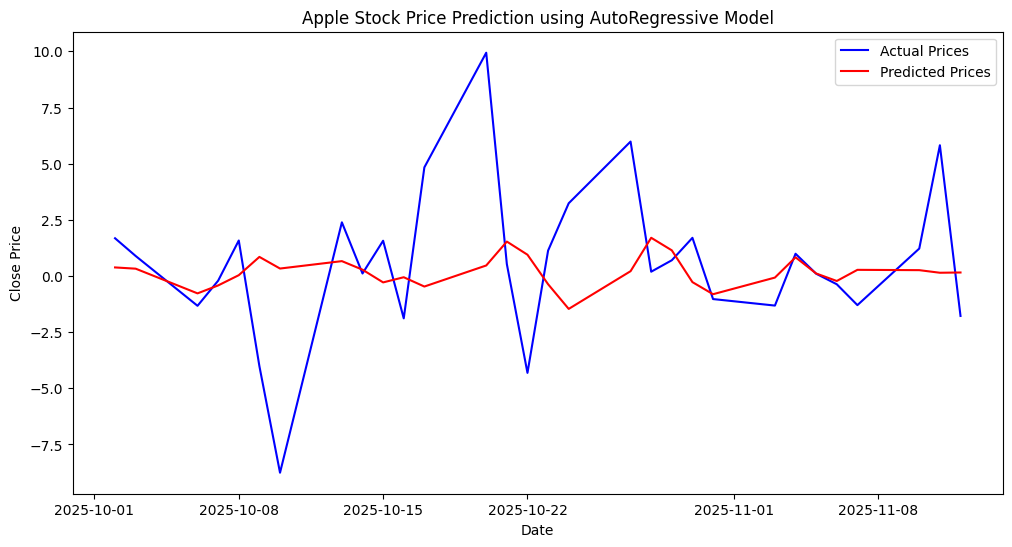

Mean Squared Error: 12.417863350434489
Root Mean Squared Error: 3.523898884819837


In [39]:
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')

#fit the auto regressive model
model = ARIMA(train_data, order=(0,0,30))

model_fit = model.fit()

#make predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

#plot the actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label='Actual Prices', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Prices', color='red')
plt.title('Apple Stock Price Prediction using AutoRegressive Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#evaluate the model
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Auto Regressive Moving Average (ARMA)

- combineAR & MA model for forecasting

- capture both temporal dependencies & error

- order of ARMA (p, q)


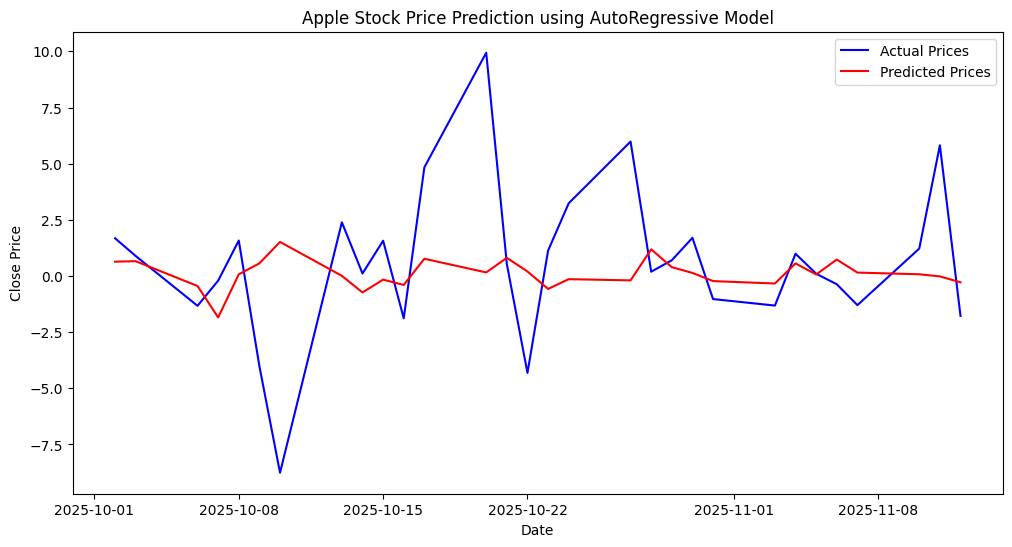

Mean Squared Error: 12.553155496630199
Root Mean Squared Error: 3.5430432535646808


In [40]:

#fit the auto regressive model
model = ARIMA(train_data, order=(7,0,7))

model_fit = model.fit()

#make predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

#plot the actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label='Actual Prices', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Prices', color='red')
plt.title('Apple Stock Price Prediction using AutoRegressive Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#evaluate the model
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Auto Regressive Integrated Moving Average - ARIMA Model

- 'I' stands for part involves differencing order

- ARIMA (p, d, q)

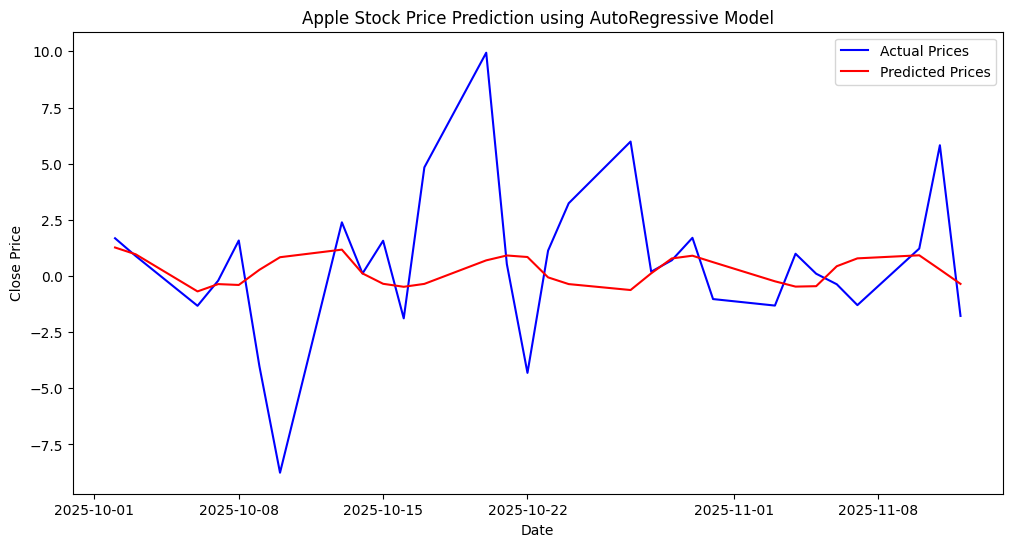

Mean Squared Error: 12.134995844732686
Root Mean Squared Error: 3.4835320932543


In [41]:


#fit the auto regressive model
model = ARIMA(train_data, order=(7,1,7))

model_fit = model.fit()

#make predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

#plot the actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label='Actual Prices', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Prices', color='red')
plt.title('Apple Stock Price Prediction using AutoRegressive Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#evaluate the model
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Seasonal Auto Regressive Integrated Moving Average - SARIMA Model

- order of SARIMA model (p, d, q)(P, D, Q)m

- (p, d, q) - order of ARIMA model

- (P, D, Q) - oder of seasonal

- m is the period

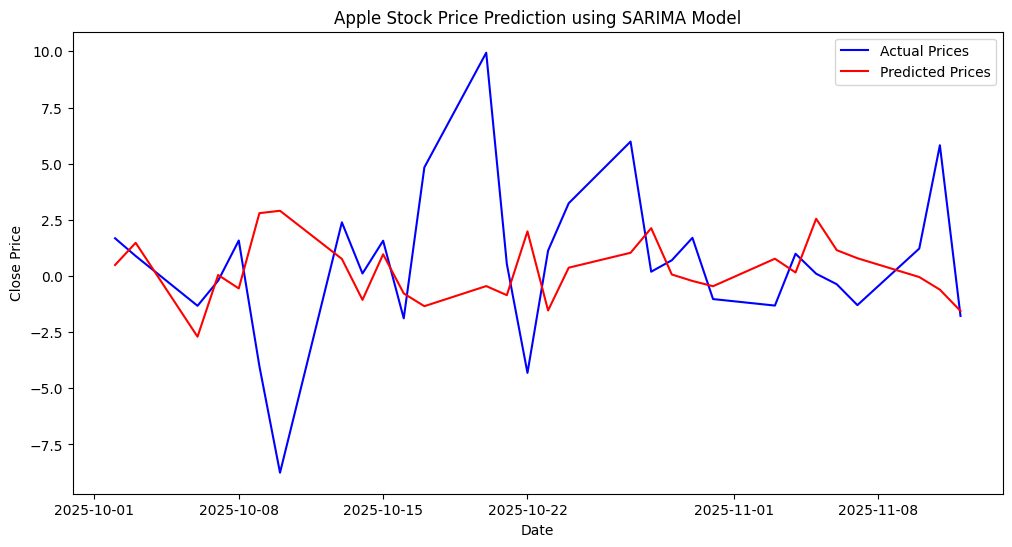

Mean Squared Error: 16.43
Root Mean Squared Error: 4.05


In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')

#fit the auto regressive model
model = SARIMAX(train_data, order=(7,1,7), seasonal_order=(1,1,1,45))
model_fit = model.fit()

#make predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

#plot the actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label='Actual Prices', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Prices', color='red')
plt.title('Apple Stock Price Prediction using SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#evaluate the model
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error: {mse:.2f}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')




Vector Auto Regressive (VAR) - mutli variable model

In [43]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.211212,128.954561,122.324586,128.343780,112117500
2023-01-04,124.482033,126.747853,123.221057,125.004155,89113600
2023-01-05,123.161942,125.871071,122.905811,125.240583,80962700
2023-01-06,127.693573,128.353614,123.033875,124.137232,87754700
2023-01-09,128.215698,131.427258,127.959568,128.530950,70790800


In [44]:
tsla_data = yf.download("TSLA", start="2023-01-01")
tsla_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800
2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000
2023-01-05,110.339996,111.750000,107.160004,110.510002,157986300
2023-01-06,113.059998,114.389999,101.809998,103.000000,220911100
2023-01-09,119.769997,123.519997,117.110001,118.959999,190284000


In [45]:


stock_data['TSLA_Close'] = tsla_data['Close']
stock_data['APPL_Close'] = stock_data['Close'].shift()  # lagged by 1 day
stock_data.dropna(inplace=True)

from statsmodels.tsa.stattools import grangercausalitytests

# perform Granger Causality test
granger_test = grangercausalitytests(stock_data[['APPL_Close','TSLA_Close']].dropna(), maxlag=[14])
print()


Granger Causality
number of lags (no zero) 14
ssr based F test:         F=10.7783 , p=0.0000  , df_denom=675, df_num=14
ssr based chi2 test:   chi2=157.3798, p=0.0000  , df=14
likelihood ratio test: chi2=142.0371, p=0.0000  , df=14
parameter F test:         F=10.7783 , p=0.0000  , df_denom=675, df_num=14



In [46]:
stock_data

Price,Close,High,Low,Open,Volume,TSLA_Close,APPL_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2023-01-04,124.482033,126.747853,123.221057,125.004155,89113600,113.639999,123.211212
2023-01-05,123.161942,125.871071,122.905811,125.240583,80962700,110.339996,124.482033
2023-01-06,127.693573,128.353614,123.033875,124.137232,87754700,113.059998,123.161942
2023-01-09,128.215698,131.427258,127.959568,128.530950,70790800,119.769997,127.693573
2023-01-10,128.787079,129.309201,126.215868,128.324063,63896200,118.849998,128.215698
...,...,...,...,...,...,...,...
2025-11-06,269.508728,273.135217,267.630574,267.630574,51204000,445.910004,269.878387
2025-11-07,268.209991,272.026299,266.511626,269.538690,48227400,429.519989,269.508728


In [47]:
data = stock_data[['APPL_Close','TSLA_Close']].diff().dropna()
train_data, test_data = data[:-14], data[-14:]

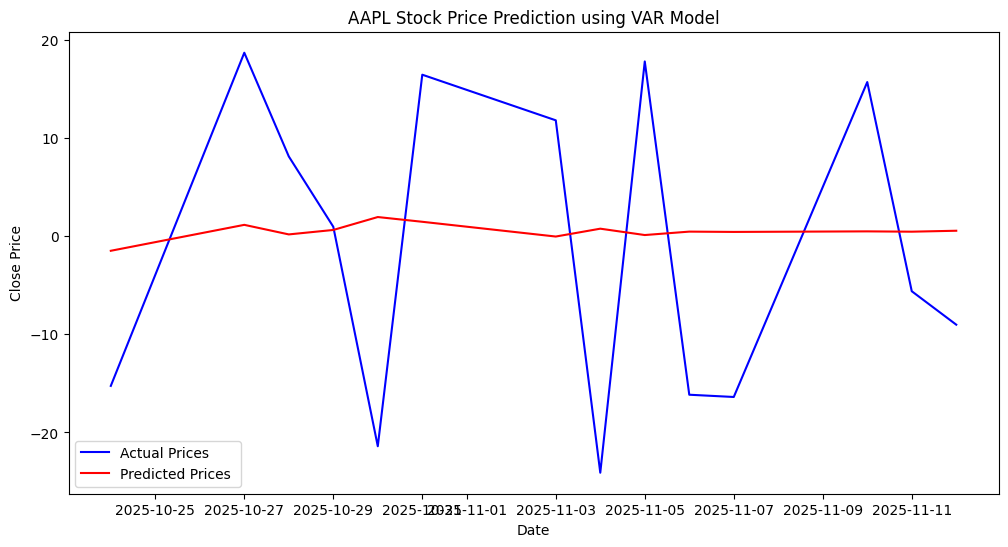

Mean Squared Error for AAPL: 7.02


In [48]:
from statsmodels.tsa.api import VAR, VARMAX

#fit the VAR model
model = VAR(train_data)
result = model.fit(maxlags=7)
predictions = result.forecast(train_data.values[-result.k_ar:], steps=len(test_data))

predictions = pd.DataFrame(predictions, index=test_data.index, columns=test_data.columns)
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Prices', color='blue')
plt.plot(predictions.index, predictions['TSLA_Close'], label='Predicted Prices ', color='red')
plt.title('AAPL Stock Price Prediction using VAR Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()  


#evaluate the model for AAPL
mse_aapl = mean_squared_error(test_data['APPL_Close'], predictions['APPL_Close'])
print(f'Mean Squared Error for AAPL: {mse_aapl:.2f}')
rmse_aapl = np.sqrt(mse_aapl)   
         

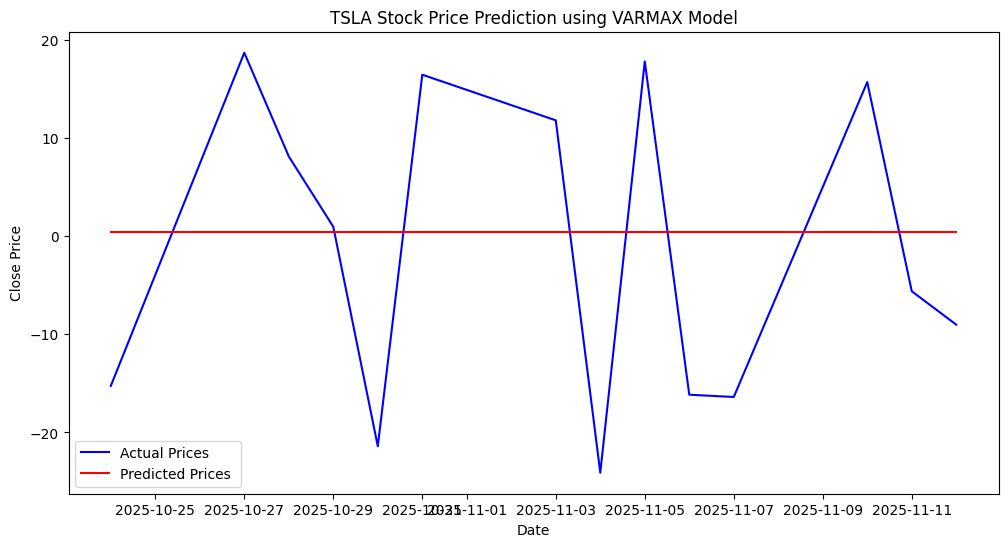

Mean Squared Error for TSLA: 237.64
Root Mean Squared Error for TSLA: 15.42


In [49]:
model = VARMAX(train_data, order=(0,14))
result = model.fit()

predictions = result.predict(start=len(train_data), end=len(train_data)+len(test_data)-1,dynamic=False)

plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Prices', color='blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label='Predicted Prices ', color='red')
plt.title('TSLA Stock Price Prediction using VARMAX Model')     
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#evaluate the model for TSLA
mse_tsla = mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])
print(f'Mean Squared Error for TSLA: {mse_tsla:.2f}')
rmse_tsla = np.sqrt(mse_tsla)
print(f'Root Mean Squared Error for TSLA: {rmse_tsla:.2f}')


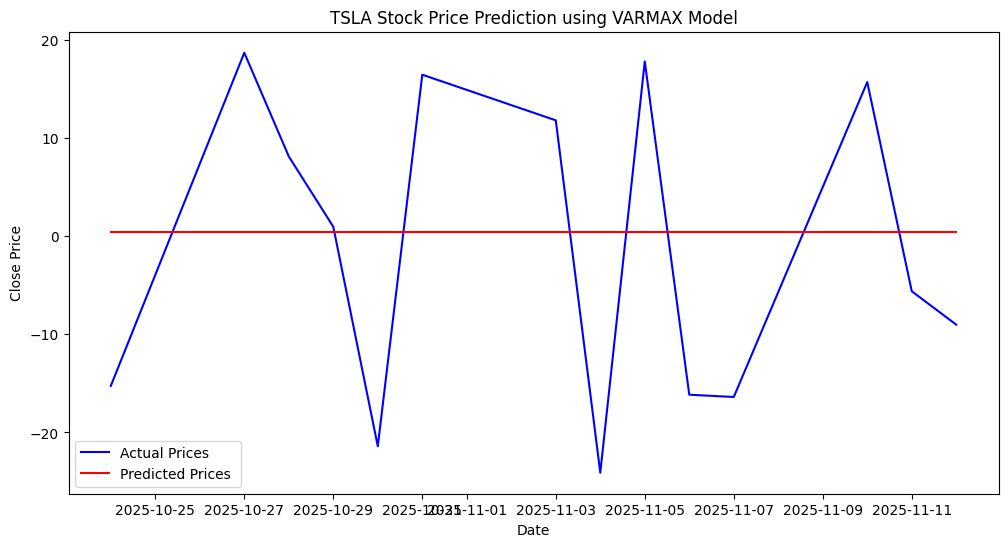

Mean Squared Error for TSLA: 237.64
Root Mean Squared Error for TSLA: 15.42


In [50]:
# vARIMA Model

model = VARMAX(train_data, order=(14,14))
result = model.fit()

predictions = result.predict(start=len(train_data), end=len(train_data)+len(test_data)-1,dynamic=False)

plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Prices', color='blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label='Predicted Prices ', color='red')
plt.title('TSLA Stock Price Prediction using VARMAX Model')     
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#evaluate the model for TSLA
mse_tsla = mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])
print(f'Mean Squared Error for TSLA: {mse_tsla:.2f}')
rmse_tsla = np.sqrt(mse_tsla)
print(f'Root Mean Squared Error for TSLA: {rmse_tsla:.2f}')


Why Smooth Data?

1. Smoothing reduces random noise to make underlying patterns clearer. It's used for:

    - Noise Reduction: Cleans up highly fluctuated charts.

    - Trend Identification: Makes long-term trends easier to see.

    - Forecasting: Creates a stable base for predictions.

2. Moving Averages (MA)

 - These average data points over a specific "window" of time.

    - Simple (SMA): All points in the window are weighted equally.

    - Weighted (WMA): Recent points are given more weight.

    - Exponential (EMA): A type of WMA where weights decrease exponentially for older data. It's very responsive to new changes.

3. Exponential Smoothing (ES)

- A family of forecasting models that use exponential weighting.

    - Single ES: For data with no trend or seasonality.

    - Double ES (Holt's): For data with a trend but no seasonality.

    - Triple ES (Holt-Winters): For data with both a trend and seasonality.

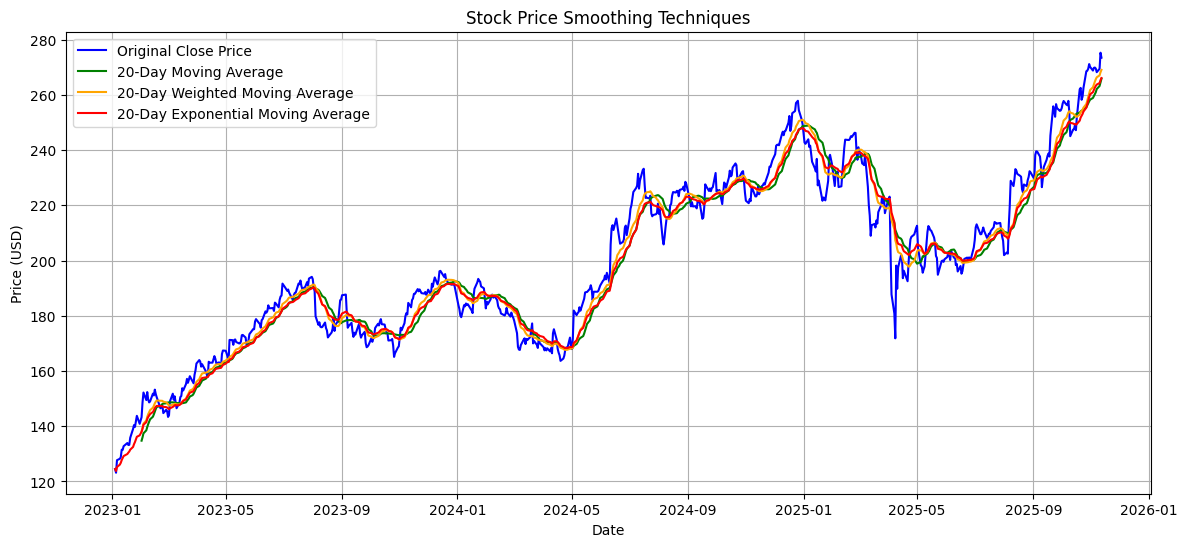

In [51]:
#Smoothing Techniques

# Moving Average Smoothing

window_size = 20  # 20-day moving average
stock_data['SMA']= stock_data['Close'].rolling(window=window_size).mean()

weights = np.arange(1, window_size + 1)
stock_data['WMA'] = stock_data['Close'].rolling(window=window_size).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)   

# calculate Exponential Moving Average
stock_data['EMA'] = stock_data['Close'].ewm(span=window_size).mean()

plt.figure(figsize=(14,6))
plt.plot(stock_data.index, stock_data['Close'], label='Original Close Price', color='blue')
plt.plot(stock_data.index, stock_data['SMA'], label='20-Day Moving Average', color='green')
plt.plot(stock_data.index, stock_data['WMA'], label='20-Day Weighted Moving Average', color='orange')
plt.plot(stock_data.index, stock_data['EMA'], label='20-Day Exponential Moving Average', color='red')
plt.title('Stock Price Smoothing Techniques')   
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()



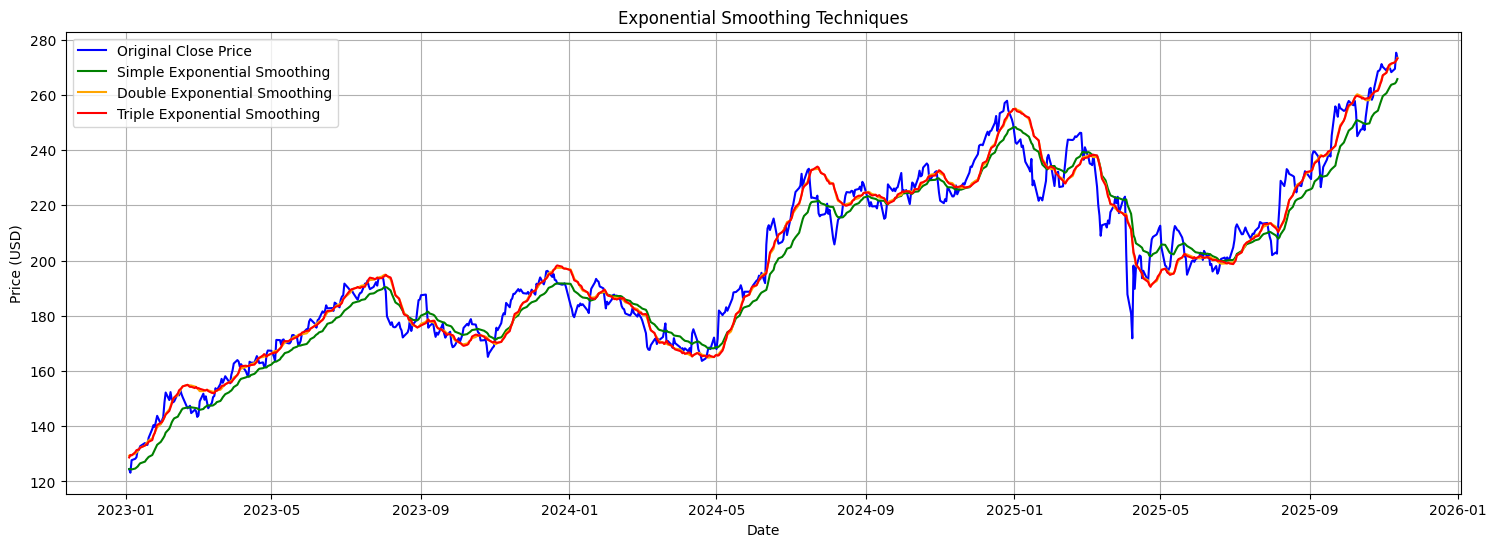

In [52]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing

close_prices = stock_data['Close']

# Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(close_prices).fit(smoothing_level=0.1)

# Double Exponential Smoothing
des_model = ExponentialSmoothing(close_prices, trend='add').fit(smoothing_level=0.1)

# Holt-Winters Triple Exponential Smoothing
tes_model = ExponentialSmoothing(close_prices, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.1)
stock_data['TES'] = tes_model.fittedvalues

#plotting the results
plt.figure(figsize=(18,6))
plt.plot(stock_data.index, close_prices, label='Original Close Price', color='blue')
plt.plot(stock_data.index, ses_model.fittedvalues, label='Simple Exponential Smoothing', color='green')
plt.plot(stock_data.index, des_model.fittedvalues, label='Double Exponential Smoothing', color='orange')
plt.plot(stock_data.index, tes_model.fittedvalues, label='Triple Exponential Smoothing', color='red')
plt.title('Exponential Smoothing Techniques')   
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()  
plt.show()

ACF (Auto Correlation Function) & PACF (Partial Auto Correlation Function)

- Why They Are Used
    - ACF and PACF are diagnostic plots used to identify the "p" and "q" orders for ARIMA models. They help you understand how "related" a time series is to its own past values.

    - ACF (Autocorrelation Function): Shows the total correlation between a data point and its past values (lags). This includes both direct and indirect correlations.

    - PACF (Partial Autocorrelation Function): Shows the direct correlation between a data point and a past value, after removing the effects of all shorter lags.

- When and Where They Are Used
    -You use these plots after making your data stationary (e.g., by differencing) but before building your ARIMA model. Their primary use is to determine if your model needs Autoregressive (AR) terms, Moving Average (MA) terms, or both.

- How to Read the Plots
    - You look for two simple patterns:

    - "Cuts Off": Spikes are significant for one or more lags and then immediately drop into the insignificant zone (the blue band).

    - "Tails Off": Spikes gradually get smaller and smaller, often in an exponential or wave-like pattern.

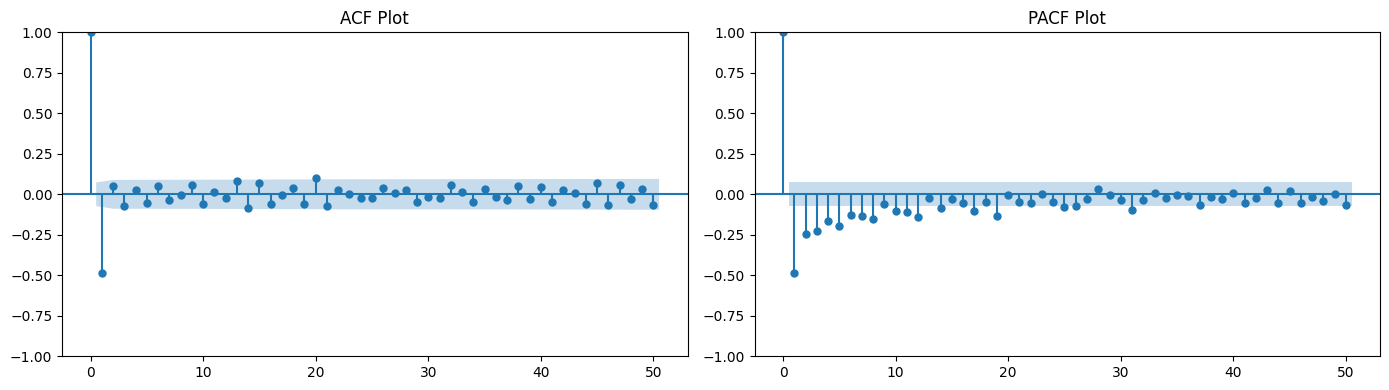

In [53]:
# ACF and PACF  

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plot_acf(stock_data['Close'].diff().diff().dropna(), lags=50, ax=plt.gca())
plt.title('ACF Plot')
plt.subplot(1,2,2)
plot_pacf(stock_data['Close'].diff().diff().dropna(), lags=50, ax=plt.gca(), method='ywm')
plt.title('PACF Plot')
plt.tight_layout()
plt.show()

1. "Cuts Off" (What an AR model looks like)
    - A "cut off" is sudden and immediate.

    - You would see 8 significant spikes, and then at lag 9, the spike would be completely inside the blue band (insignificant), and everything after it would also be inside.

    - Analogy: It's like falling off a cliff.

2. "Tails Off" (What your PACF plot shows)
    - "Tailing off" is gradual and slow.

    - The spikes get smaller and smaller over time, like a wave dying down or a hill sloping to zero.

    - In your PACF plot, the spikes at lags 1, 2, 3... 8 are all significant, but the ones after 8 are also significant, just a little bit smaller. They are slowly decaying.

    - Analogy: It's like walking down a hill.

- Applying this to Your Plots:
    - ACF Plot (Left): Look at lag 1 (it's huge). Now look at lag 2. It's tiny and inside the blue band. This is a perfect, clean "cut off" at lag 1.

    - PACF Plot (Right): Look at lags 1, 2, 3... 8... 10... 12. They are all slowly getting smaller. They never just stop. This is a classic "tail off".

- Final Rule:
    - Your ACF cuts off at 1. This gives you q = 1.

    - Your PACF tails off. This gives you p = 0.

    - Your model is MA(1), or ARIMA(0, 0, 1).

## Model Evaluation Metrics.

1. MAE (Mean Absolute Error)
    - What it is: Measures the average absolute difference between the predicted values and the actual values.

    - Interpretation: It tells you, "On average, how far off was our prediction?" The result is in the same units as your data (e.g., if you're predicting stock prices, the MAE is in dollars).

    - Sensitivity: It treats all errors equally, whether they are large or small. It is less sensitive to outliers than MSE or RMSE.

2. MSE (Mean Squared Error)
    - What it is: Measures the average of the squared differences between predicted and actual values.

    - Interpretation: By squaring the errors, it heavily penalizes large errors. This makes it very useful if you care a lot about avoiding big mistakes.

    - Sensitivity: It is very sensitive to outliers. The result is in squared units (e.g., dollars-squared), which makes it hard to interpret directly.

3. RMSE (Root Mean Squared Error)
    - What it is: This is simply the square root of the MSE.

    - Interpretation: It's the best of both worlds. Like MSE, it penalizes large errors, but by taking the square root, it puts the final result back into the same units as your original data (e.g., dollars).

    - Sensitivity: It is also sensitive to outliers (just like MSE) but is much more interpretable. It's one of the most popular metrics.

4. MAPE (Mean Absolute Percentage Error)
    - What it is: Measures the average of the absolute percentage differences between predicted and actual values.

    - Interpretation: It tells you, "On average, by what percentage was our prediction off?" Because it's a percentage, it is unit-less.

    - Use Case: This is extremely useful for comparing forecast accuracy across different datasets or models with different scales (e.g., comparing a model for a stock worth $10 to a stock worth $1,000).

    - Limitation: It breaks (is undefined) if any actual value is zero.

5. AIC (Akaike Information Criterion) & BIC (Bayesian Information Criterion)
    - These two are different. They don't measure prediction accuracy; they are used for model selection.

    - What they do: They help you choose the best model (e.g., an ARIMA(1,0,1) vs. an ARIMA(2,1,0)) by balancing model fit (how well it explains the data) with model complexity (how many parameters it has).

    - Interpretation: They provide a single score. The model with the lowest AIC or BIC score is considered the best.

    - Key Difference: BIC penalizes model complexity more than AIC. This means BIC will often favor a simpler model than AIC.

In [54]:
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

In [55]:
# fit the auto regressive model
model = AutoReg(train_data, lags=30)
model_fit = model.fit()

#  Make predictions on test data
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. MAE (Mean Absolute Error)
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# 2. MSE (Mean Squared Error)
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# 3. RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# 4. MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# 5. AIC (Akaike Information Criterion) & BIC (Bayesian Information Criterion)
aic = model_fit.aic
bic = model_fit.bic
print(f'Akaike Information Criterion (AIC): {aic:.2f}')
print(f'Bayesian Information Criterion (BIC): {bic:.2f}')


Mean Absolute Error (MAE): 2.45
Mean Squared Error (MSE): 12.40
Root Mean Squared Error (RMSE): 3.52
Mean Absolute Percentage Error (MAPE): nan%
Akaike Information Criterion (AIC): 3457.88
Bayesian Information Criterion (BIC): 3601.53


In [62]:
# fit the auto regressive model
model = AutoReg(train_data, lags=20)
model_fit = model.fit()

#  Make predictions on test data
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. MAE (Mean Absolute Error)
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# 2. MSE (Mean Squared Error)
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# 3. RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# 4. MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# 5. AIC (Akaike Information Criterion) & BIC (Bayesian Information Criterion)
aic = model_fit.aic
bic = model_fit.bic
print(f'Akaike Information Criterion (AIC): {aic:.2f}')
print(f'Bayesian Information Criterion (BIC): {bic:.2f}')


Mean Absolute Error (MAE): 2.28
Mean Squared Error (MSE): 11.37
Root Mean Squared Error (RMSE): 3.37
Mean Absolute Percentage Error (MAPE): nan%
Akaike Information Criterion (AIC): 3499.57
Bayesian Information Criterion (BIC): 3598.66
